In [1]:
from matplotlib import cbook
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.mpl_axes import Axes
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1 import SubplotDivider, Size

In [2]:
def get_demo_image():
    z = cbook.get_sample_data("axes_grid/bivariate_normal.npy", np_load=True)
    # z is a numpy array of 15x15
    return z, (-3, 4, -4, 3)

In [3]:
def demo_simple_image(ax):
    Z, extent = get_demo_image()
    im = ax.imshow(Z, extent=extent)
    cb = plt.colorbar(im)
    cb.ax.yaxis.set_tick_params(labelright=False)

In [4]:
def demo_locatable_axes_hard(fig):
    divider = SubplotDivider(fig, 2, 2, 2, aspect=True)
    # axes for image
    ax = fig.add_axes(divider.get_position(), axes_class=Axes)
    # axes for colorbar
    # (the label prevents Axes.add_axes from incorrectly believing that the two
    # axes are the same)
    ax_cb = fig.add_axes(divider.get_position(), axes_class=Axes, label="cb")
    h = [
        Size.AxesX(ax),  # main axes
        Size.Fixed(0.05),  # padding, 0.1 inch
        Size.Fixed(0.2),  # colorbar, 0.3 inch
    ]
    
    v = [Size.AxesY(ax)]
    divider.set_horizontal(h)
    divider.set_vertical(v)
    
    ax.set_axes_locator(divider.new_locator(nx=0, ny=0))
    ax_cb.set_axes_locator(divider.new_locator(nx=2, ny=0))
    ax_cb.axis["left"].toggle(all=False)
    ax_cb.axis["right"].toggle(ticks=True)
    
    Z, extent = get_demo_image()
    im = ax.imshow(Z, extent=extent)
    plt.colorbar(im, cax=ax_cb)
    ax_cb.yaxis.set_tick_params(labelright=False)

In [5]:
def demo_locatable_axes_easy(ax):
    divider = make_axes_locatable(ax)
    ax_cb = divider.append_axes("right", size="5%", pad=0.05)
    fig = ax.get_figure()
    fig.add_axes(ax_cb)
    
    Z, extent = get_demo_image()
    im = ax.imshow(Z, extent=extent)
    plt.colorbar(im, cax=ax_cb)
    ax_cb.yaxis.tick_right()
    ax_cb.yaxis.set_tick_params(labelright=False)

In [6]:
def demo_images_side_by_side(ax):
    divider = make_axes_locatable(ax)
    Z, extent = get_demo_image()
    ax2 = divider.append_axes("right", size="100%", pad=0.05)
    
    fig1 = ax.get_figure()
    fig1.add_axes(ax2)
    ax.imshow(Z, extent=extent)
    ax2.imshow(Z, extent=extent)
    ax2.yaxis.set_tick_params(labelleft=False)

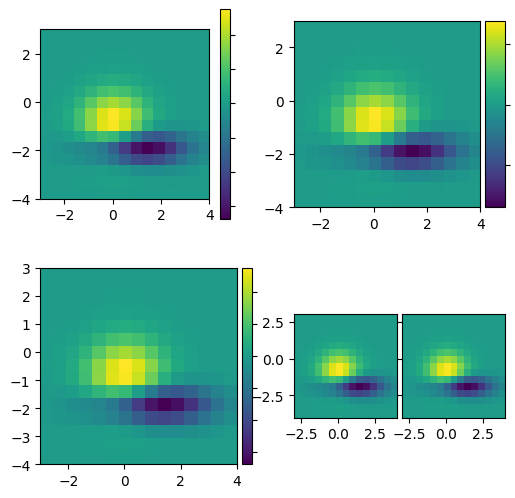

In [7]:
fig = plt.figure(figsize=(6, 6))

# PLOT 1
# simple image & colorbar
ax = fig.add_subplot(2, 2, 1)
demo_simple_image(ax)

# PLOT 2
# image and colorbar whose location is adjusted in the drawing time.
# a hard way
demo_locatable_axes_hard(fig)

# PLOT 3
# image and colorbar whose location is adjusted in the drawing time.
# a easy way
ax = fig.add_subplot(2, 2, 3)
demo_locatable_axes_easy(ax)

# PLOT 4
# two images side by side with fixed padding.
ax = fig.add_subplot(2, 2, 4)
demo_images_side_by_side(ax)

plt.show()